# Shifting Images

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def plot_before_and_after(before, after):
    fig, axes = plt.subplots(nrows=1,ncols=2,dpi=500)
    # plot the data
    axes[0].imshow(before, cmap = 'Blues_r', origin = 'lower',
                   norm=mpl.colors.LogNorm(vmin = np.percentile(before, 10), 
                                                  vmax = np.percentile(before, 99.5)))
    axes[0].set_title('Before', fontsize=15)
    axes[0].set_xlabel('x pixels')
    axes[0].set_ylabel('y pixels')


    axes[1].imshow(after, cmap = 'Blues_r', origin = 'lower',
                   norm=mpl.colors.LogNorm(vmin = np.percentile(before, 10), 
                                                  vmax = np.percentile(before, 99.5)))
    axes[1].set_title('After', fontsize=15)
    axes[1].set_xlabel('x pixels')
    # turn off tick marks
    axes[1].set_yticks([])

In [3]:
u = fits.open('M16uA.fits')[0].data
# trim off the edges
u = u[48:-47,48:-47]

In [4]:
# print some details about the image
print(u.shape)

(4001, 4001)


## Raw Data Plot

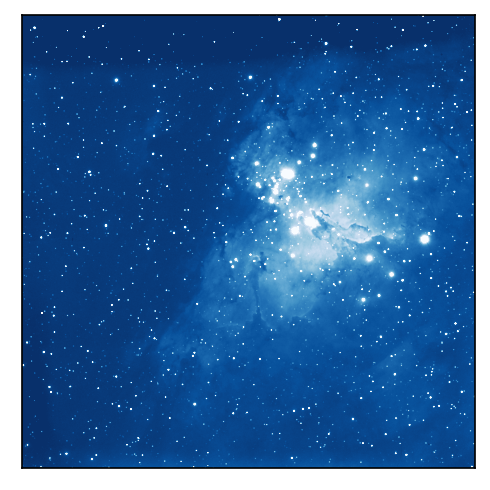

In [5]:
plt.figure(dpi=150)
plt.imshow(u, cmap = 'Blues_r', origin = 'lower',
              norm=mpl.colors.LogNorm(vmin = np.percentile(u, 10), 
                                             vmax = np.percentile(u, 99.5)))
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()

## np.roll(): pixel-level shifting

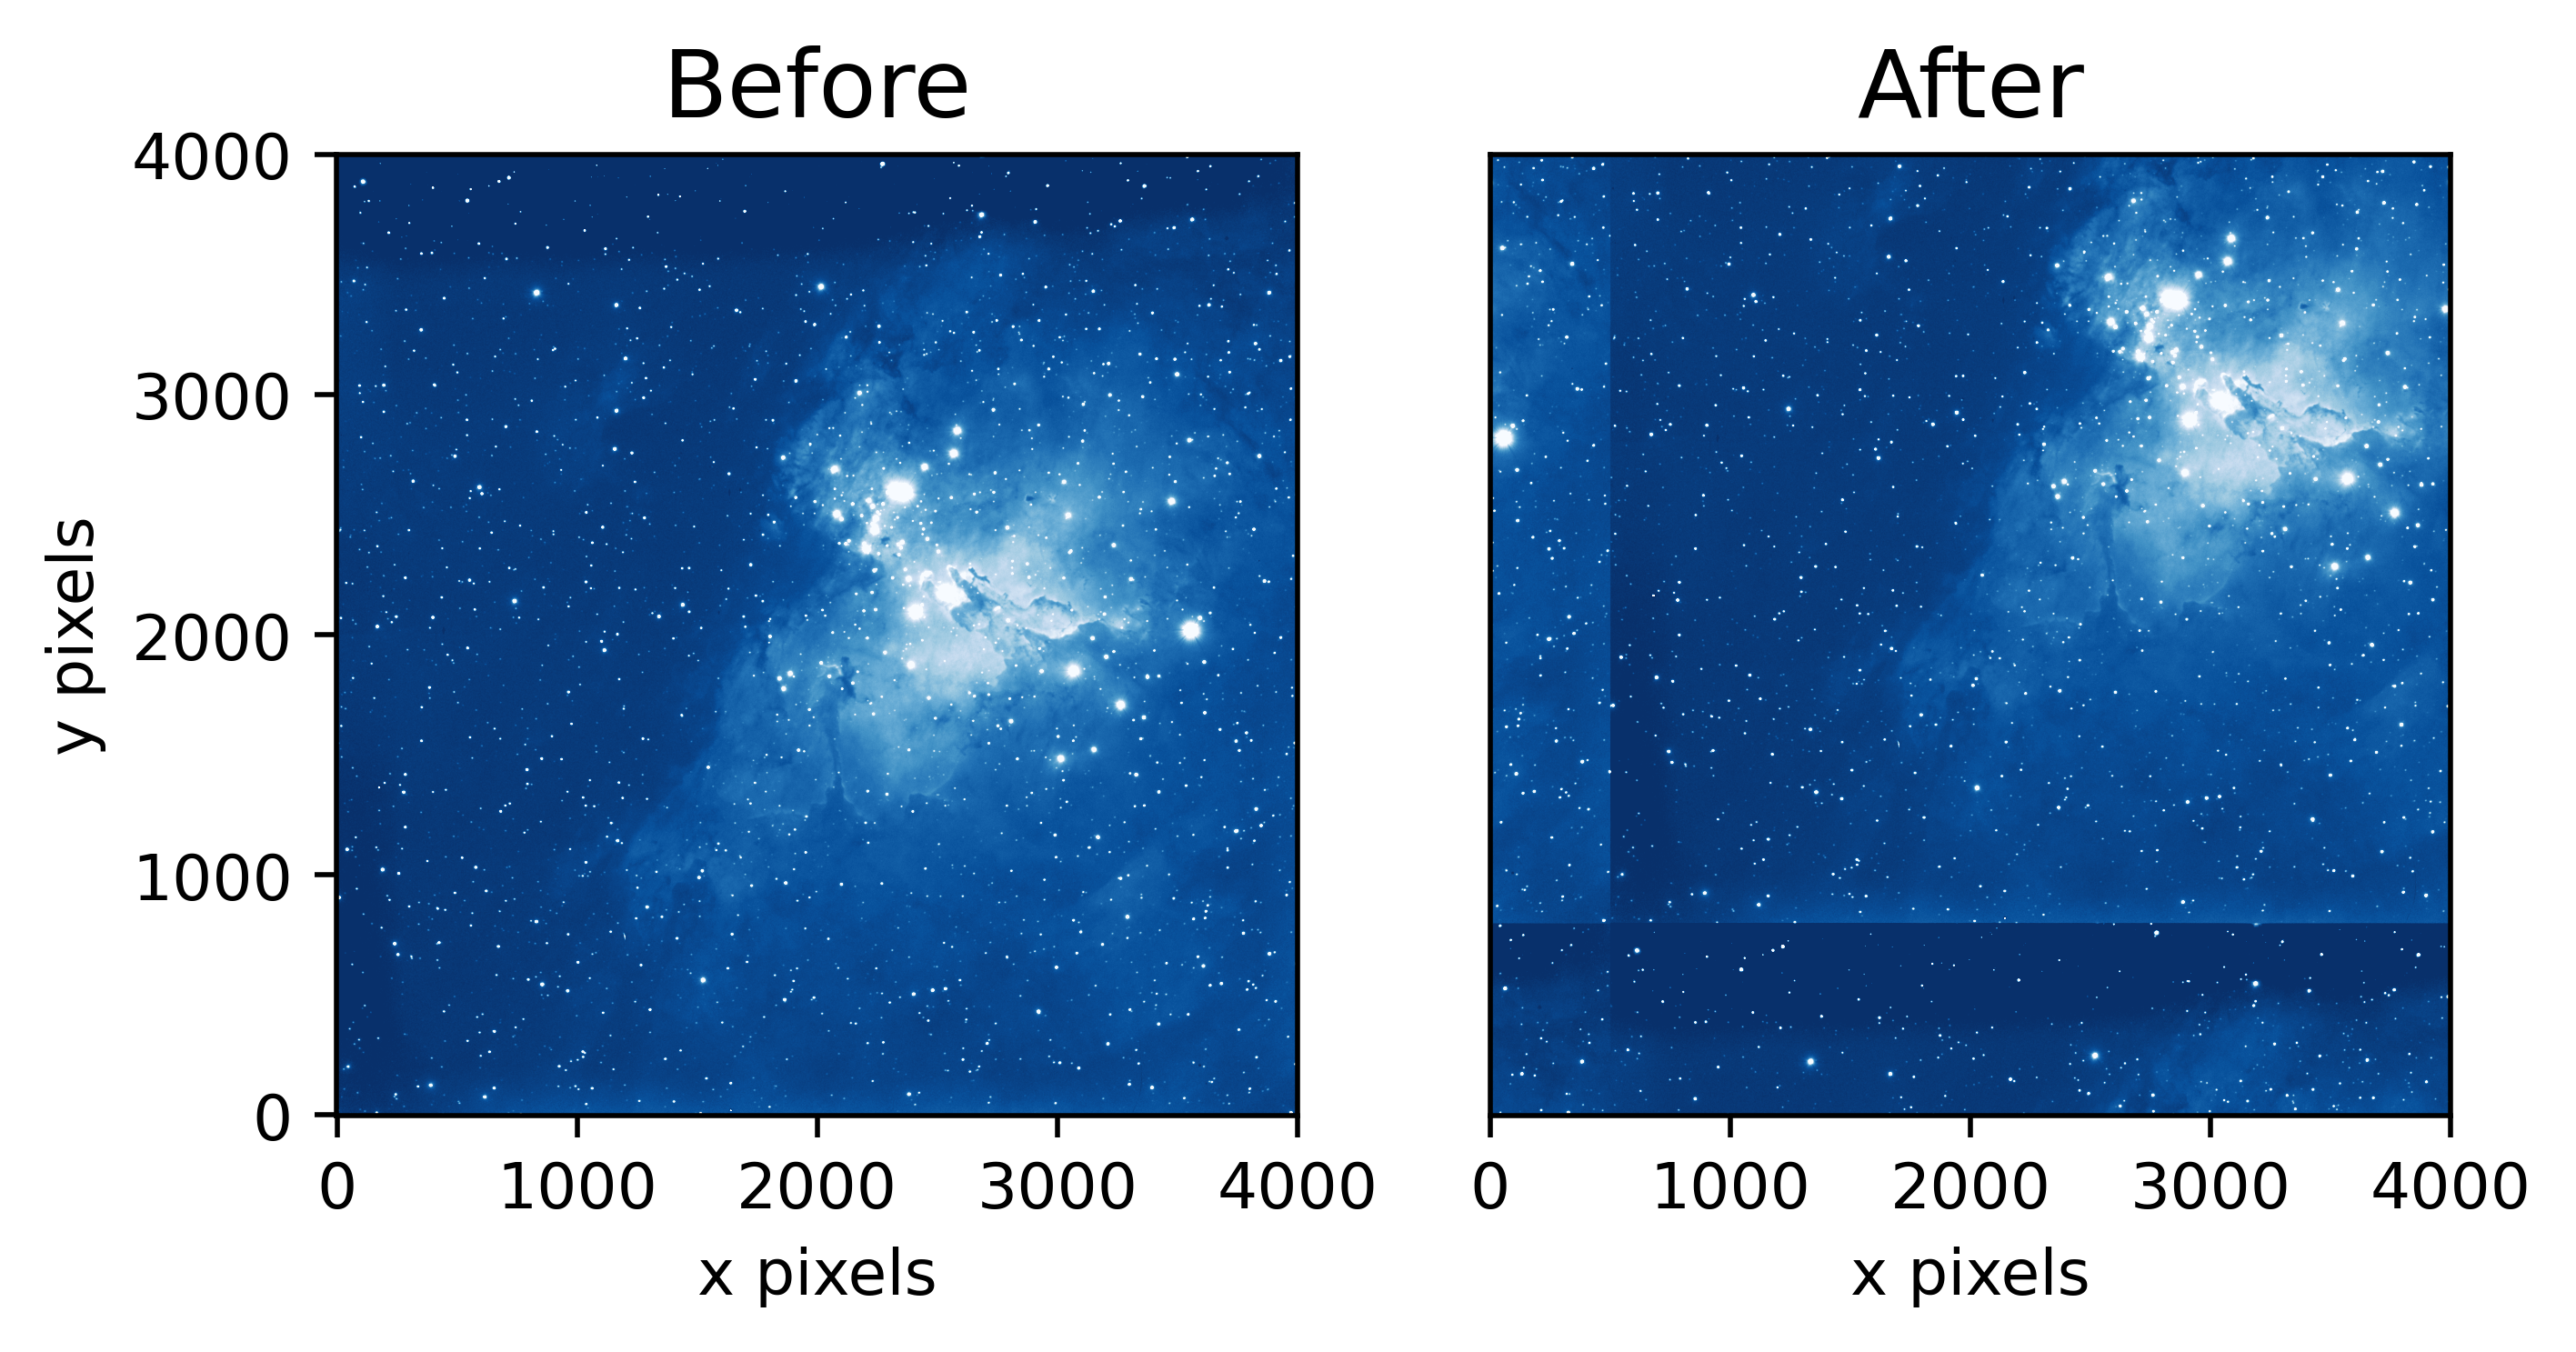

In [6]:
# shifted image
x_shift = 500
y_shift = 800

# be careful about your axes!
u_rolled = np.roll(u, [y_shift, x_shift], axis=(0,1))

plot_before_and_after(u, u_rolled)

## scipy.ndimage.shift: spline-interpolation shifting

In [7]:
from scipy.ndimage import shift

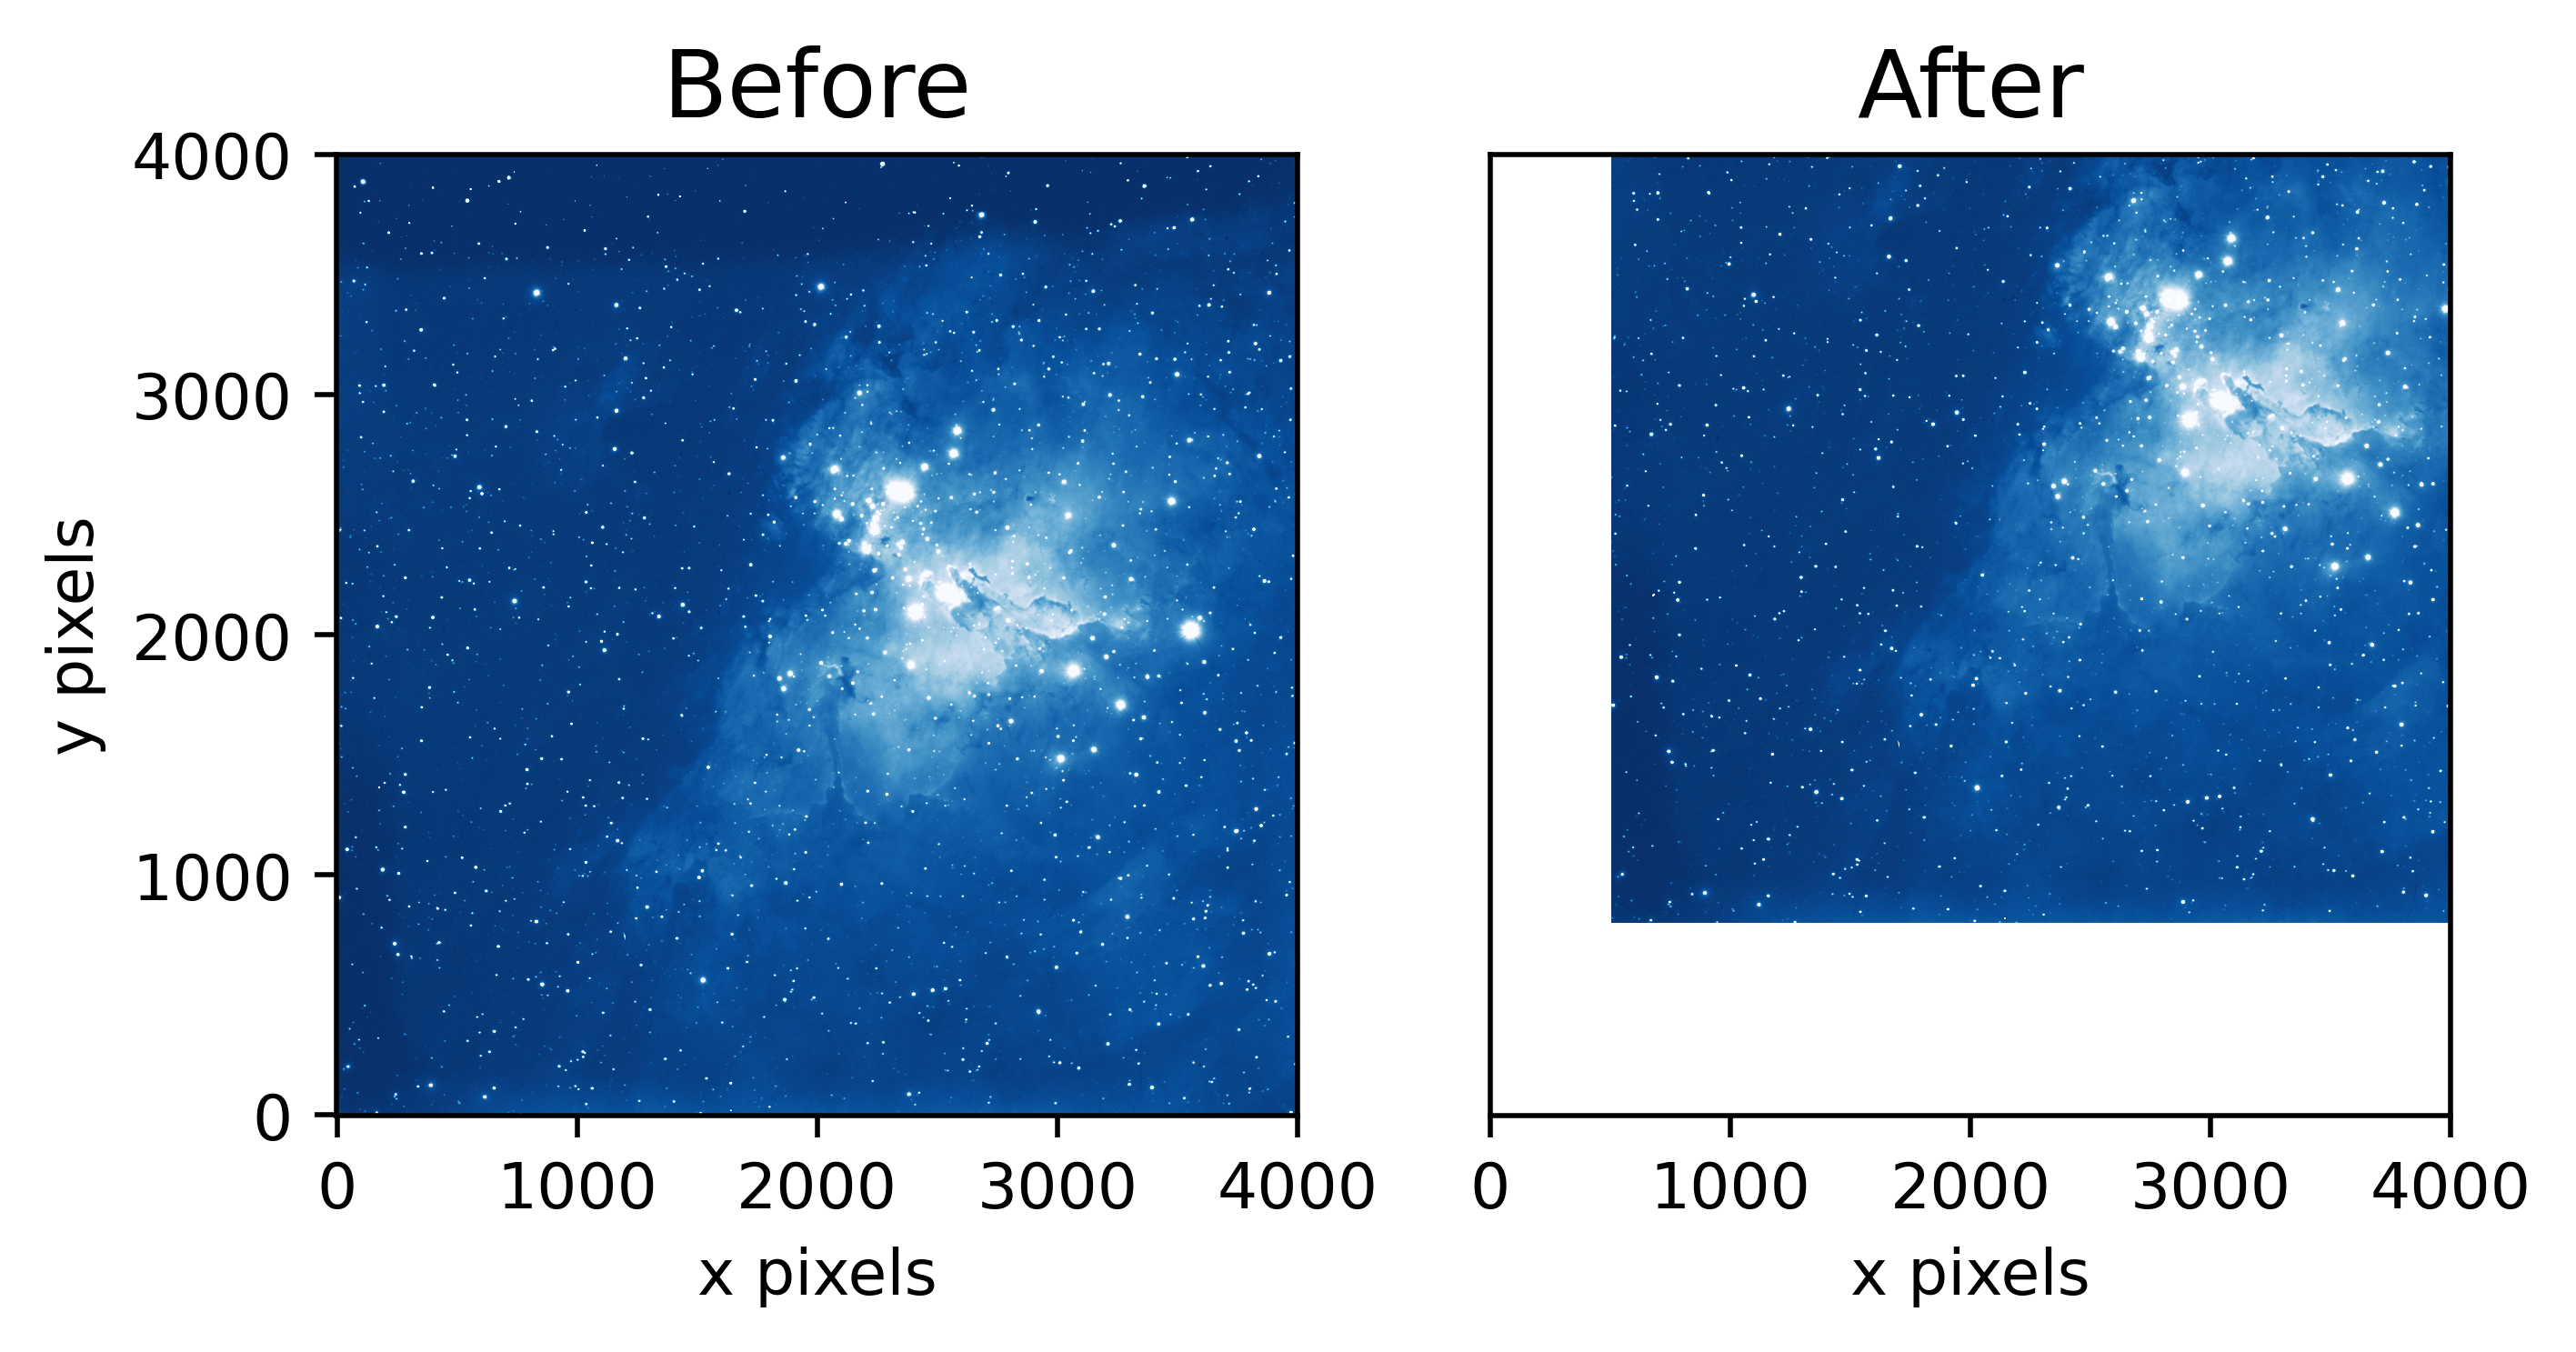

In [8]:
# shifted image
x_shift = 500.5
y_shift = 800.5

# be careful about your axes!
u_shifted = shift(u, [y_shift, x_shift])

## other options
# mode : tells function what to do about edges
# order : tells the function the order of the spline used

plot_before_and_after(u, u_shifted)

## Fourier Shift

In [9]:
from scipy.ndimage import fourier_shift
import numpy.fft

In [10]:
# shifted image
x_shift = 500
y_shift = 800


# fourier transform the input
input_ = numpy.fft.fft2(u)
# call fourier shift function
result = fourier_shift(input_, shift = [y_shift, x_shift])
# inverse fourier transform
u_fourier = numpy.fft.ifft2(result).real

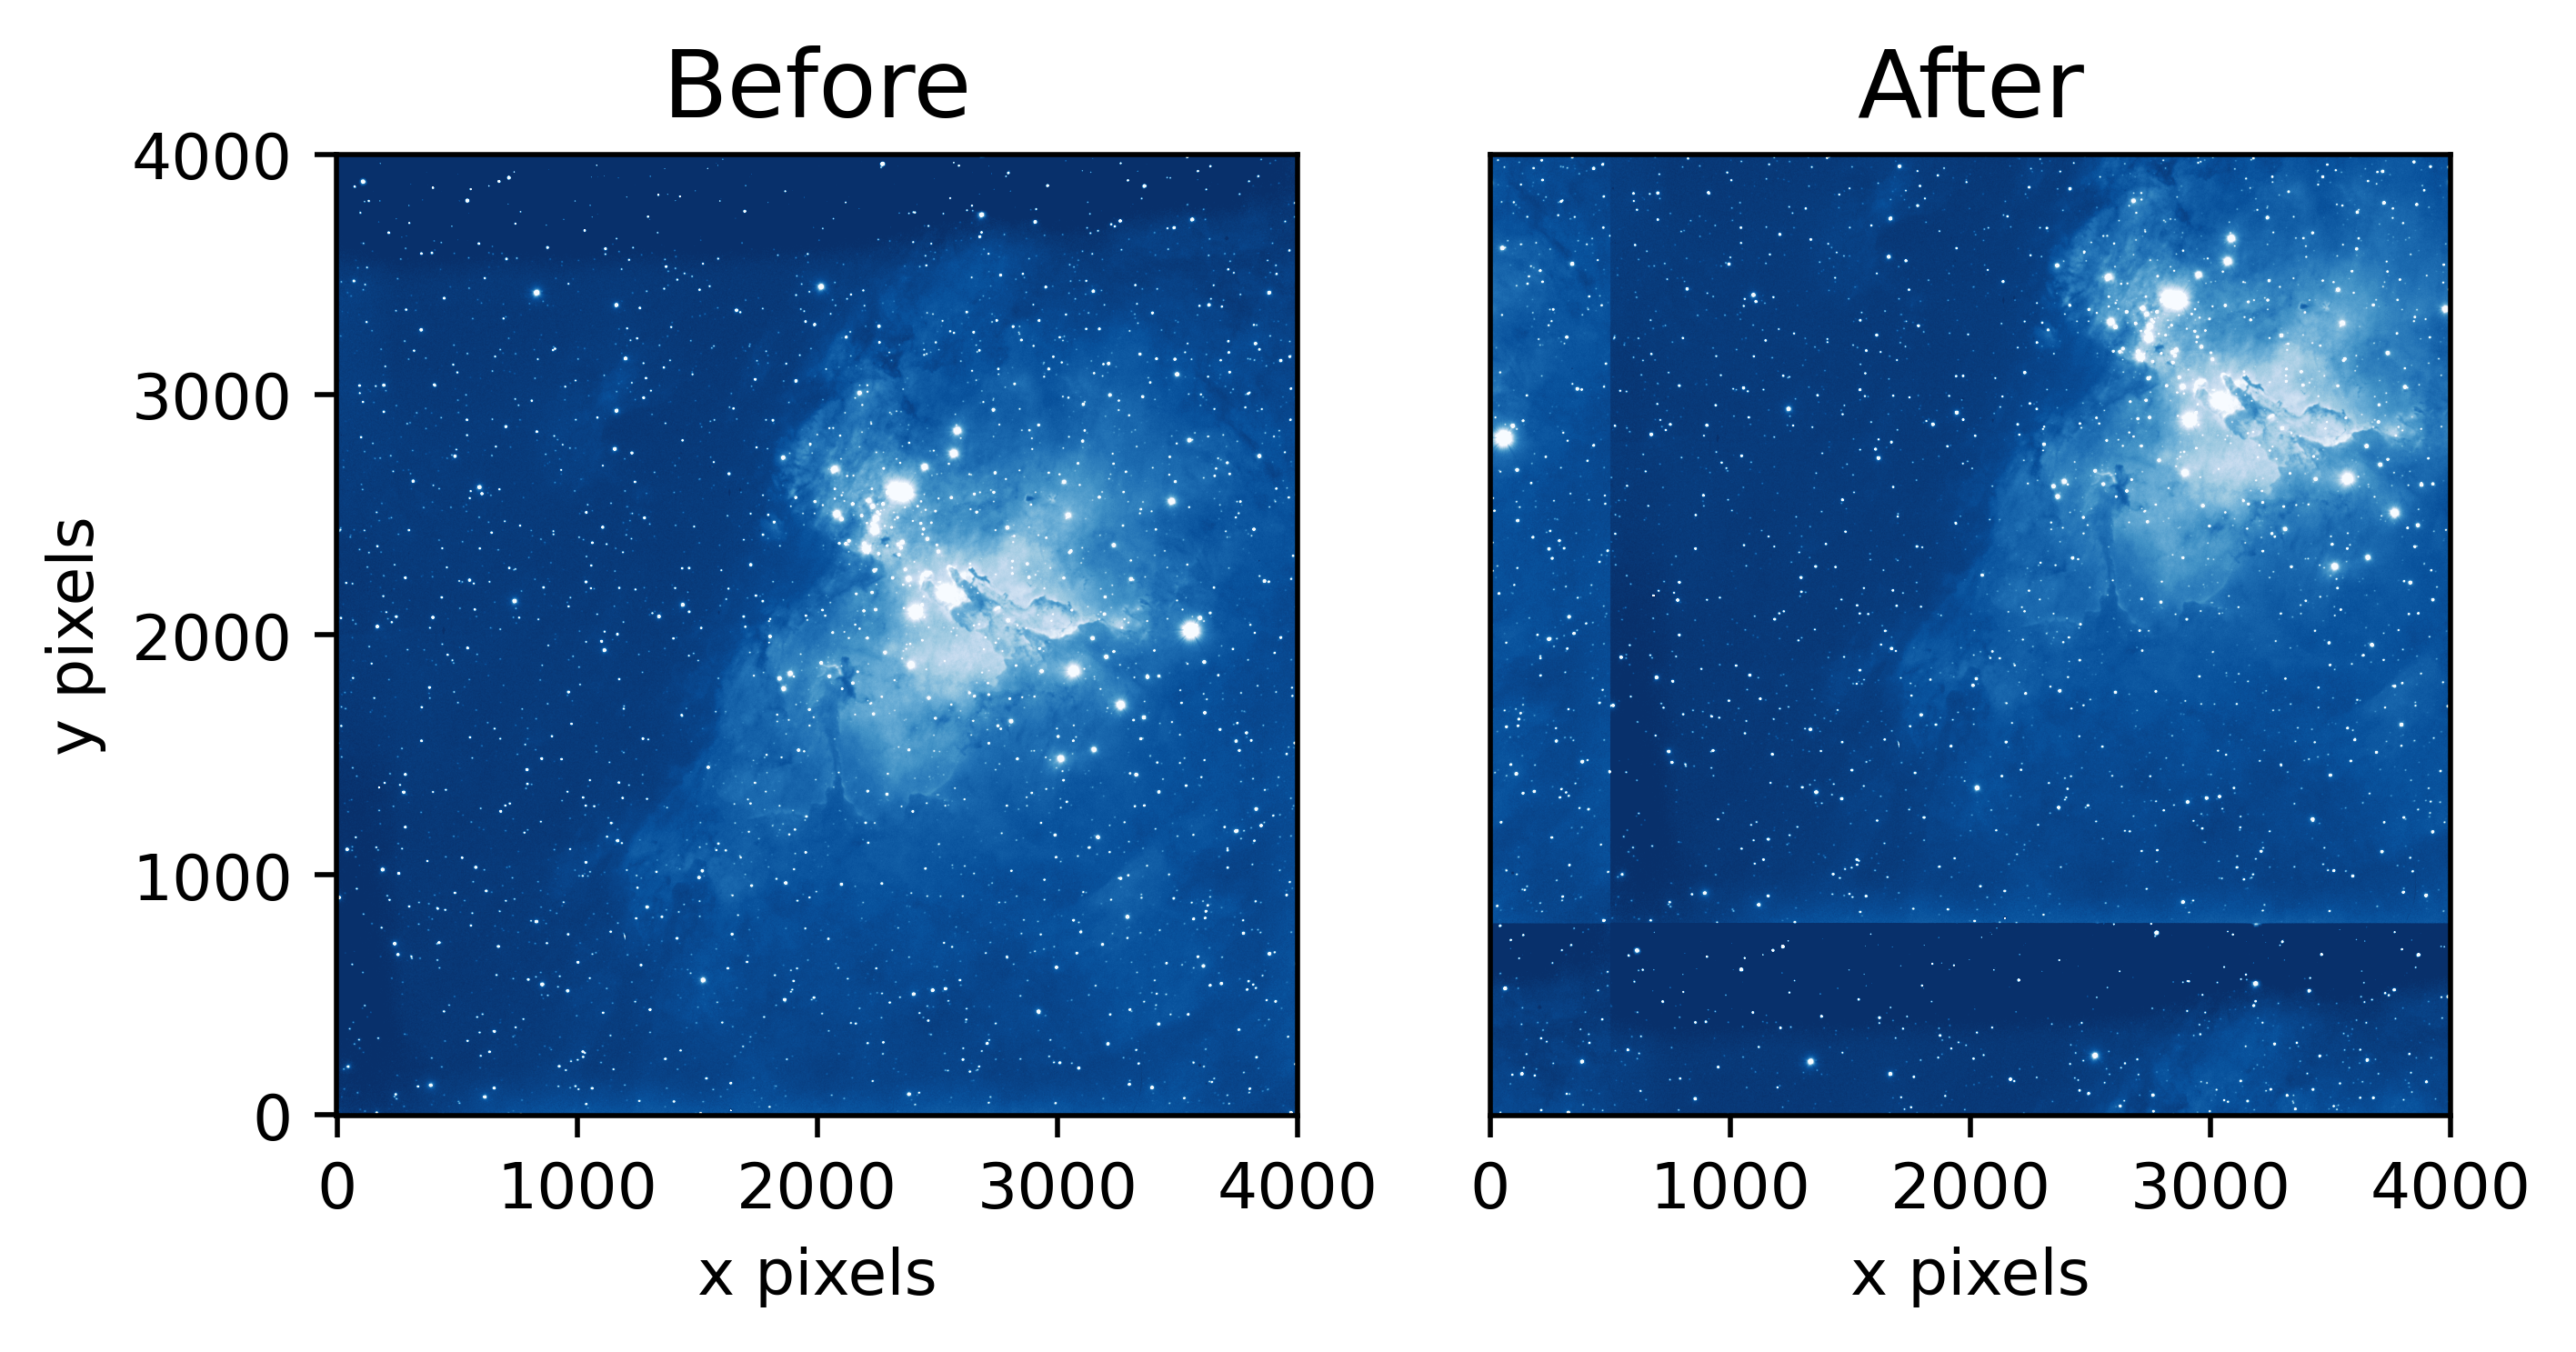

In [11]:
plot_before_and_after(u, u_fourier)

In [12]:
star = fits.open('psf_gaussian_51.fits')[0].data[20:-20,20:-20]

[]

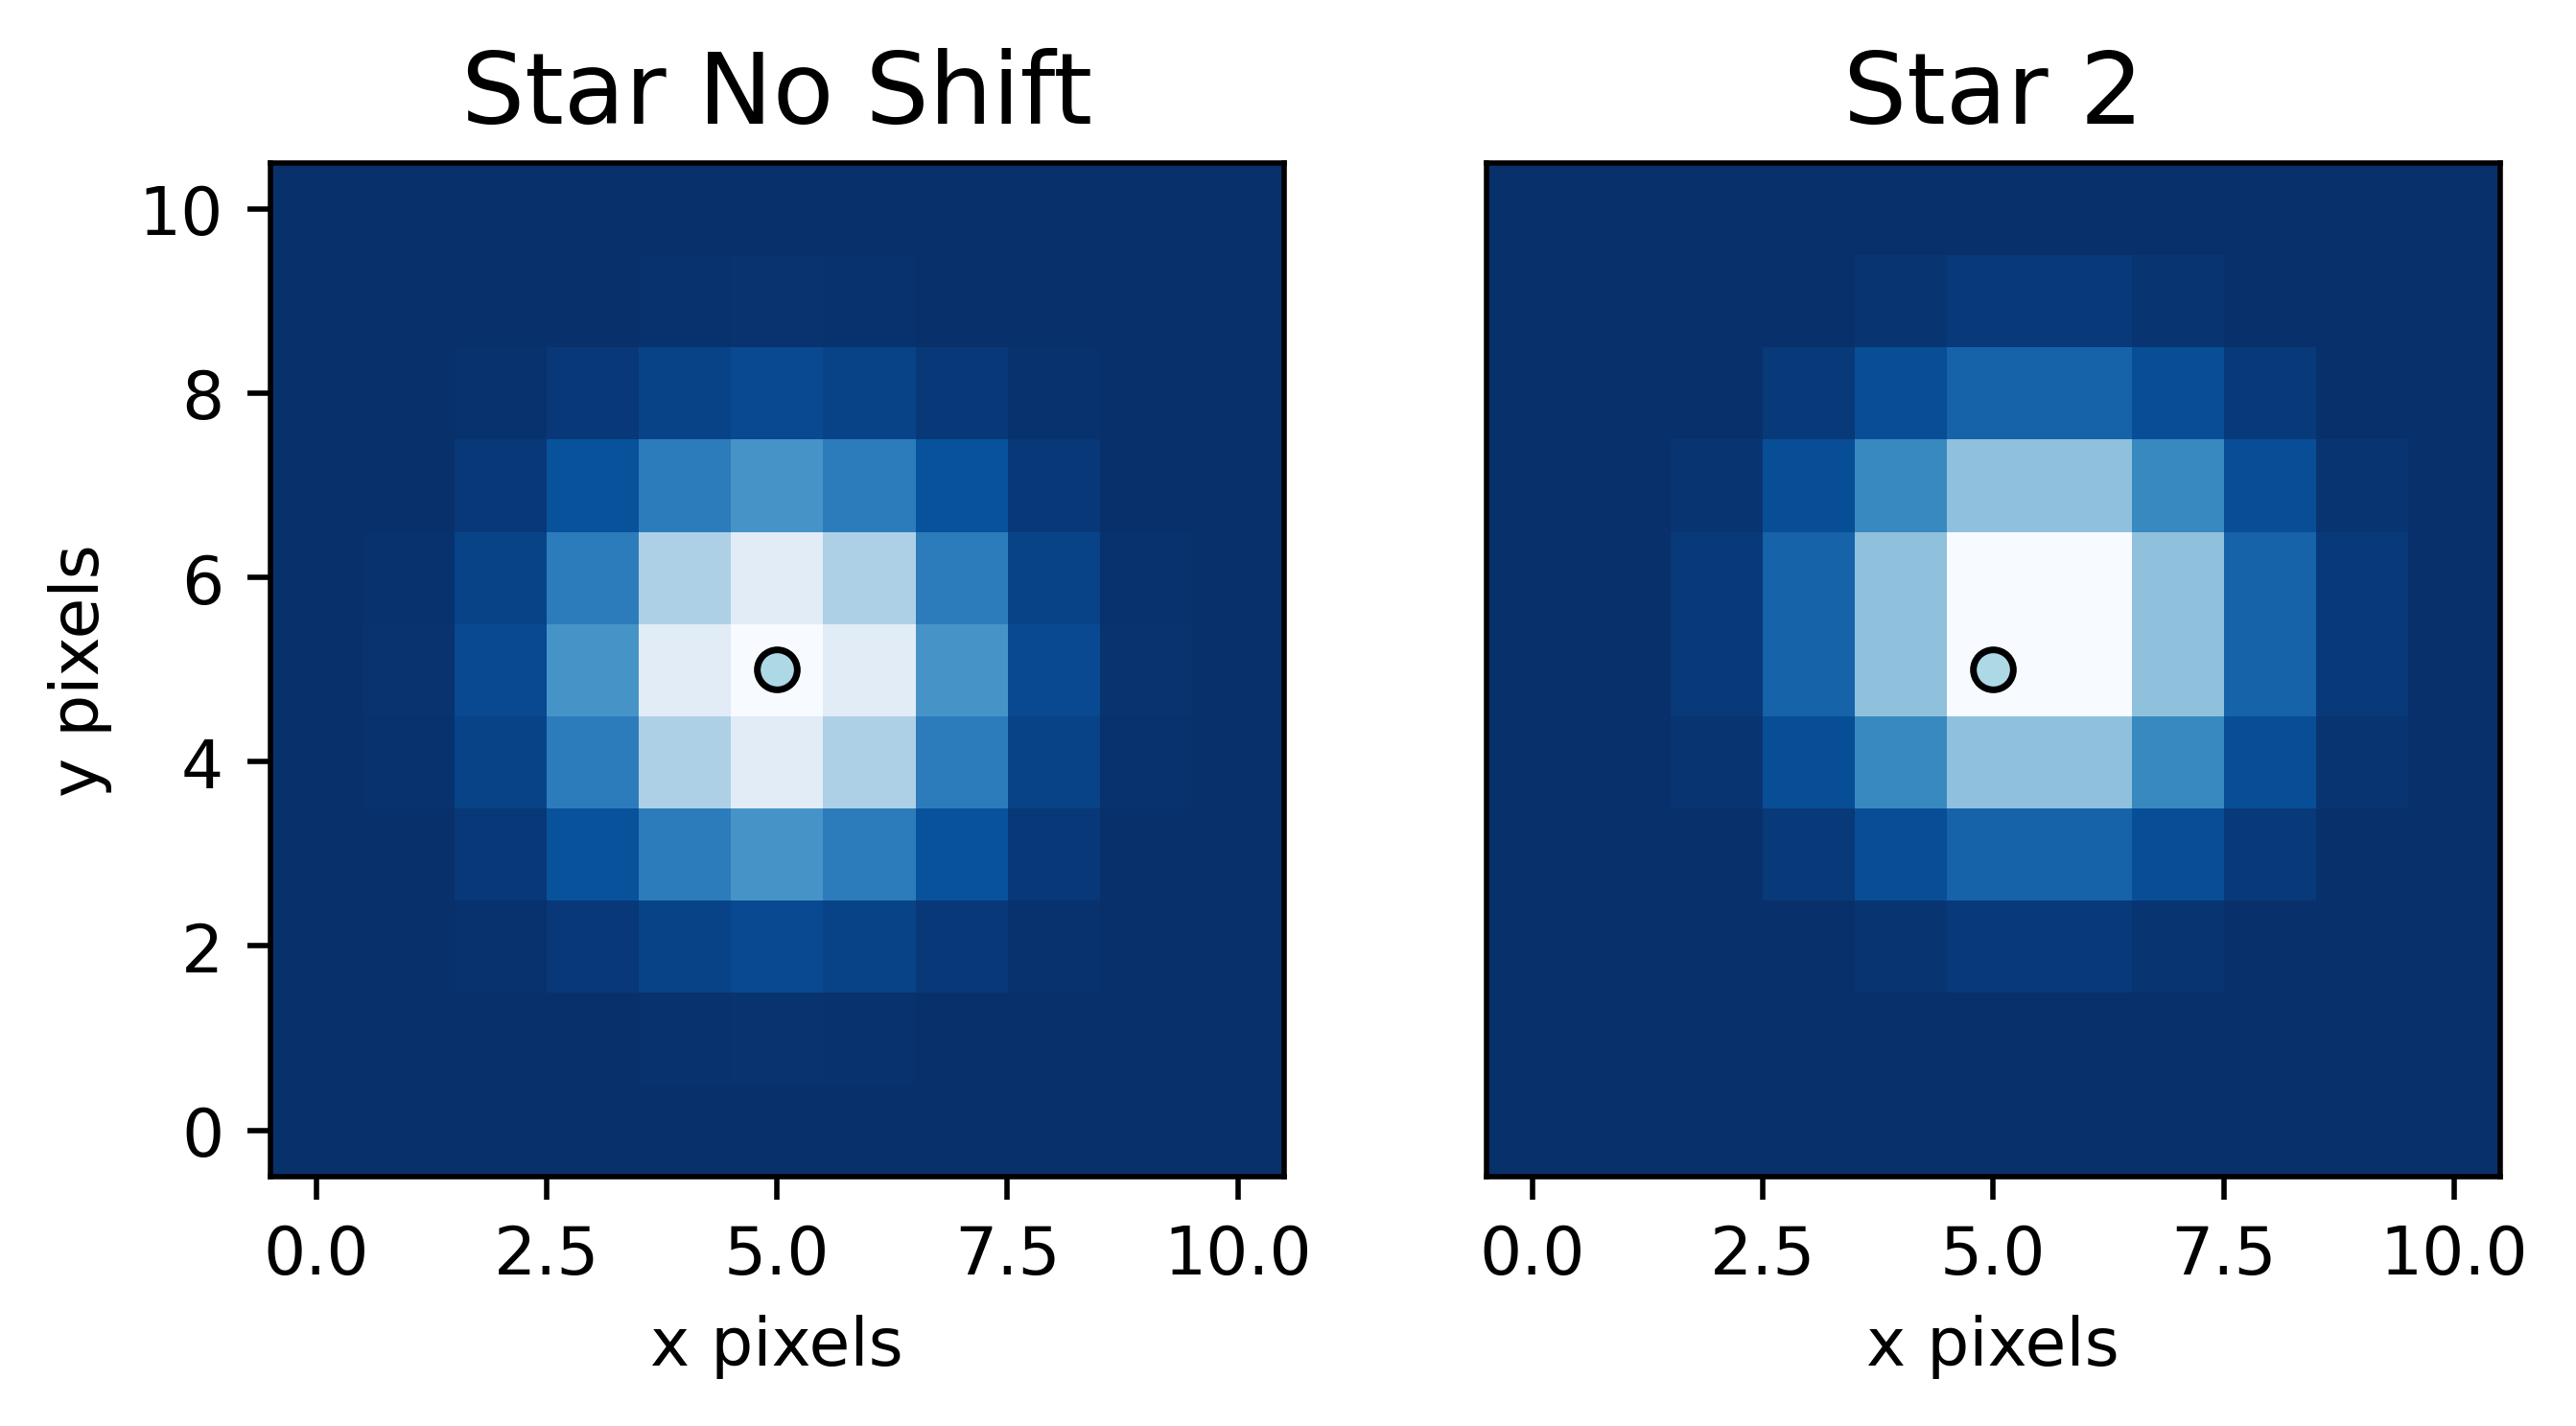

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=2,dpi=500)
# plot the data
axes[0].imshow(star, cmap = 'Blues_r', origin = 'lower', 
               vmin=np.percentile(star,10),vmax=np.percentile(star,99.5))
axes[0].set_title('Star No Shift', fontsize=15)
axes[0].set_xlabel('x pixels')
axes[0].set_ylabel('y pixels')
axes[0].scatter(5,5,color='lightblue',edgecolor='k')

# shift star by half a pixel

shifted_star = shift(star, [0.5, 0.5])


axes[1].imshow(shifted_star, cmap = 'Blues_r', origin = 'lower', 
               vmin=np.percentile(star,10),vmax=np.percentile(star,99.5))
axes[1].set_title('Star 2', fontsize=15)
axes[1].set_xlabel('x pixels')
axes[1].scatter(5,5,color='lightblue',edgecolor='k')
# turn off tick marks
axes[1].set_yticks([])

## Comparing Fourier to Interpolation

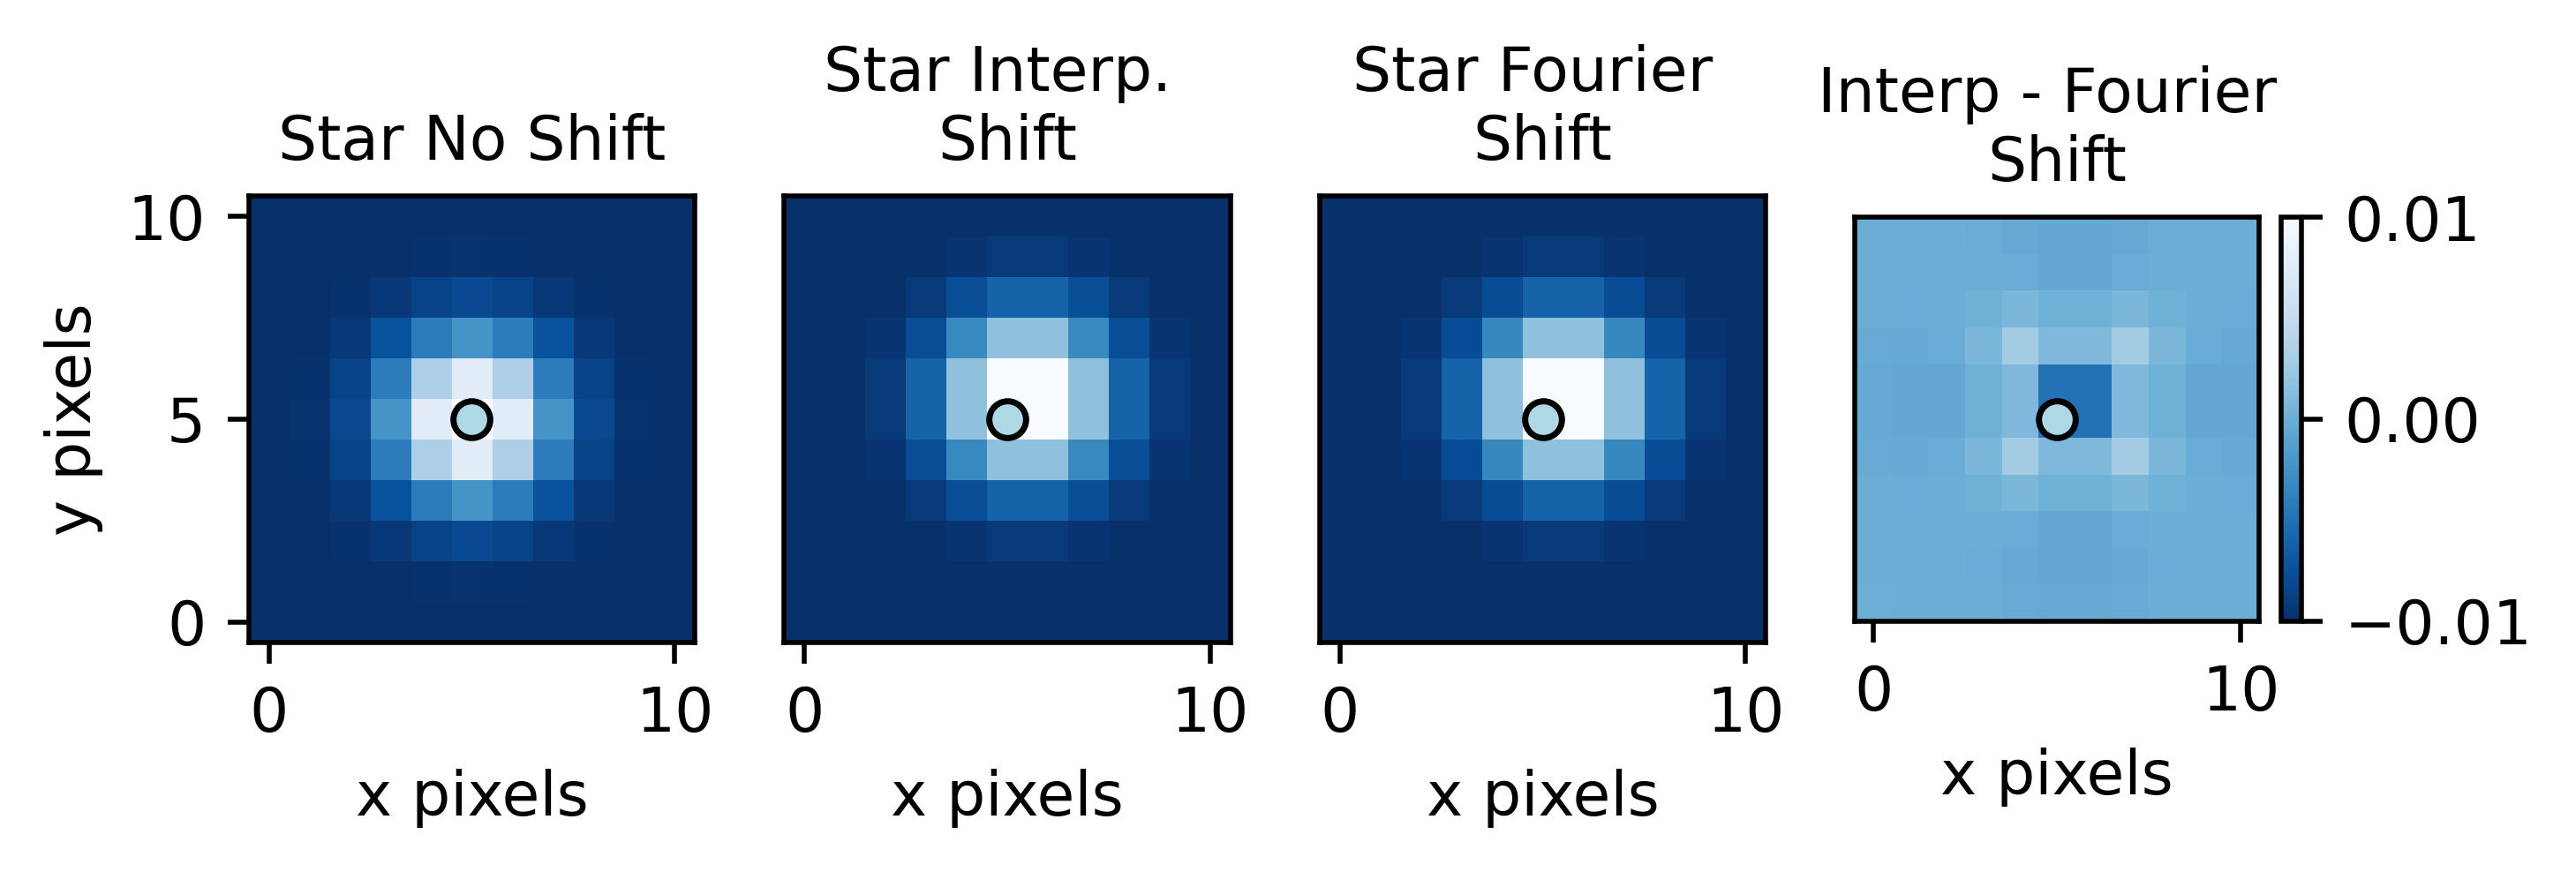

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=4,dpi=500)

# plot the data
axes[0].imshow(star, cmap = 'Blues_r', origin = 'lower', 
               vmin=np.percentile(star,10),vmax=np.percentile(star,99.5))
axes[0].set_title('Star No Shift', fontsize=10)
axes[0].set_xlabel('x pixels')
axes[0].set_ylabel('y pixels')
axes[0].scatter(5,5,color='lightblue',edgecolor='k')

# shift star by half a pixel

shifted_star = shift(star, [0.5, 0.5])


axes[1].imshow(shifted_star, cmap = 'Blues_r', origin = 'lower', 
               vmin=np.percentile(star,10),vmax=np.percentile(star,99.5))
axes[1].set_title('Star Interp. \nShift', fontsize=10)
axes[1].set_xlabel('x pixels')
axes[1].scatter(5,5,color='lightblue',edgecolor='k')
# turn off tick marks
axes[1].set_yticks([])


# fourier shift

input_ = numpy.fft.fft2(star)
# call fourier shift function
result = fourier_shift(input_, shift = [0.5, 0.5])
# inverse fourier transform
fourier_star = numpy.fft.ifft2(result).real


axes[2].imshow(fourier_star, cmap = 'Blues_r', origin = 'lower', 
               vmin=np.percentile(star,10),vmax=np.percentile(star,99.5))
axes[2].set_title('Star Fourier \nShift', fontsize=10)
axes[2].set_xlabel('x pixels')
axes[2].scatter(5,5,color='lightblue',edgecolor='k')
# turn off tick marks
axes[2].set_yticks([])


# difference between interp and fourier
diff = shifted_star - fourier_star



im = axes[3].imshow(diff, cmap = 'Blues_r', origin = 'lower', 
               vmin=-0.01,vmax=0.01)
axes[3].set_title('Interp - Fourier \nShift', fontsize=10)
axes[3].set_xlabel('x pixels')
axes[3].scatter(5,5,color='lightblue',edgecolor='k')
# turn off tick marks
axes[3].set_yticks([])
divider = make_axes_locatable(axes[3])
cax = divider.append_axes('right', size='5%', pad=0.05)


fig.colorbar(im, cax=cax, orientation='vertical')